In [1]:
library(forecast)
library(xts)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.3 



In [2]:
casediff <- as.xts(read.csv("casediff.csv", row.names = 1, stringsAsFactor = FALSE))
deathdiff <- as.xts(read.csv("deathdiff.csv", row.names = 1, stringsAsFactor = FALSE))

                 ME     RMSE      MAE       MPE     MAPE
Test set -0.4203432 1.598094 1.036301 -15.55907 18.91485


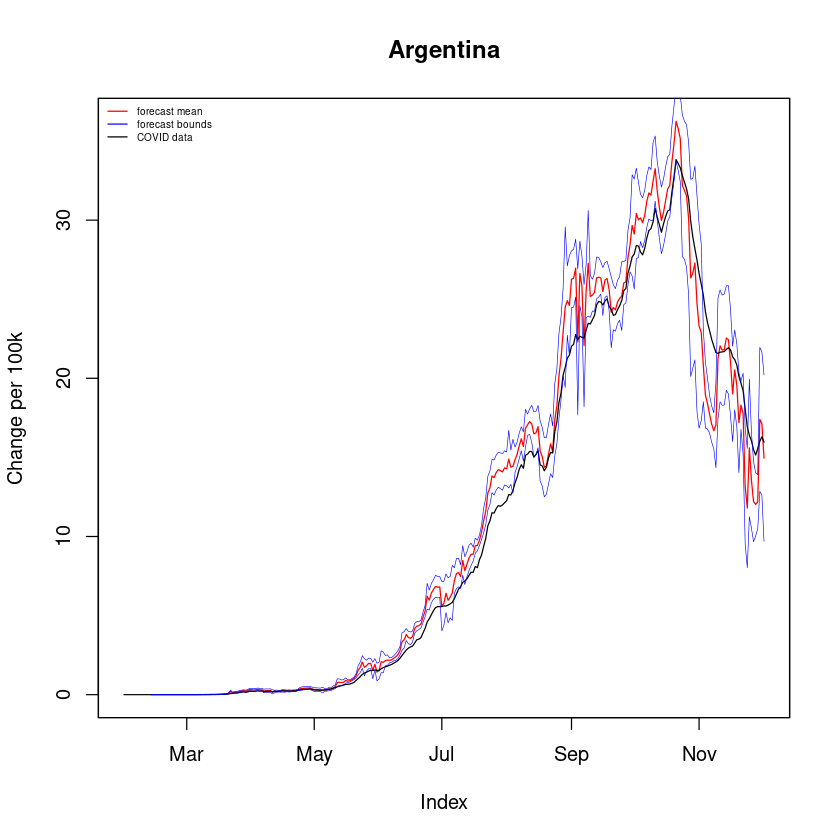

                 ME     RMSE      MAE MPE MAPE
Test set -0.1838022 15.19803 6.450695 Inf  Inf


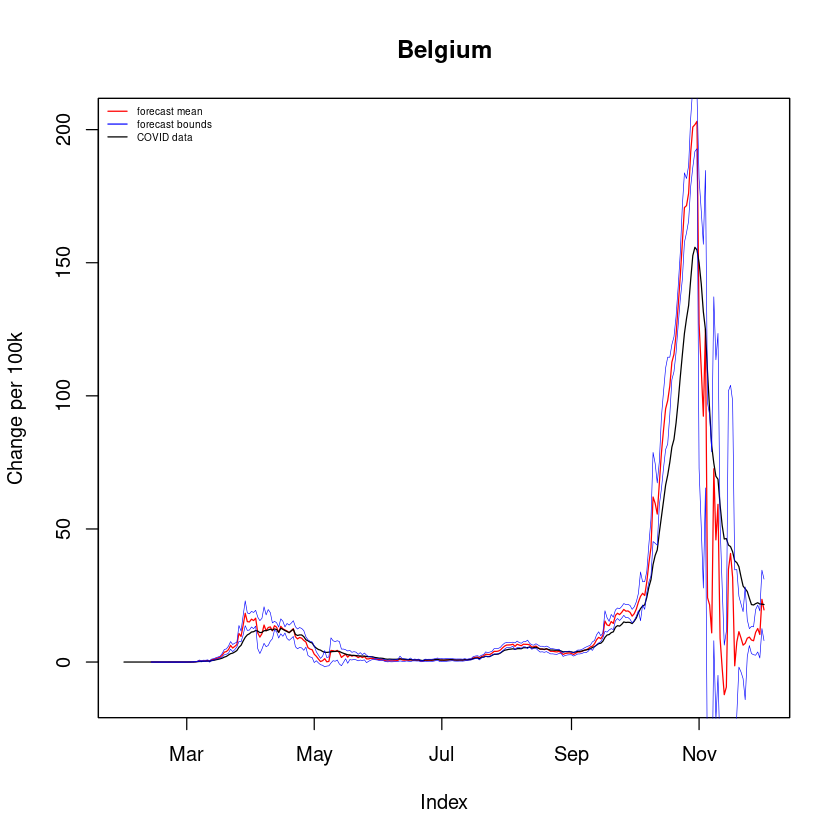

                 ME     RMSE     MAE       MPE     MAPE
Test set -0.2079304 2.508878 1.41425 -9.649506 18.13269


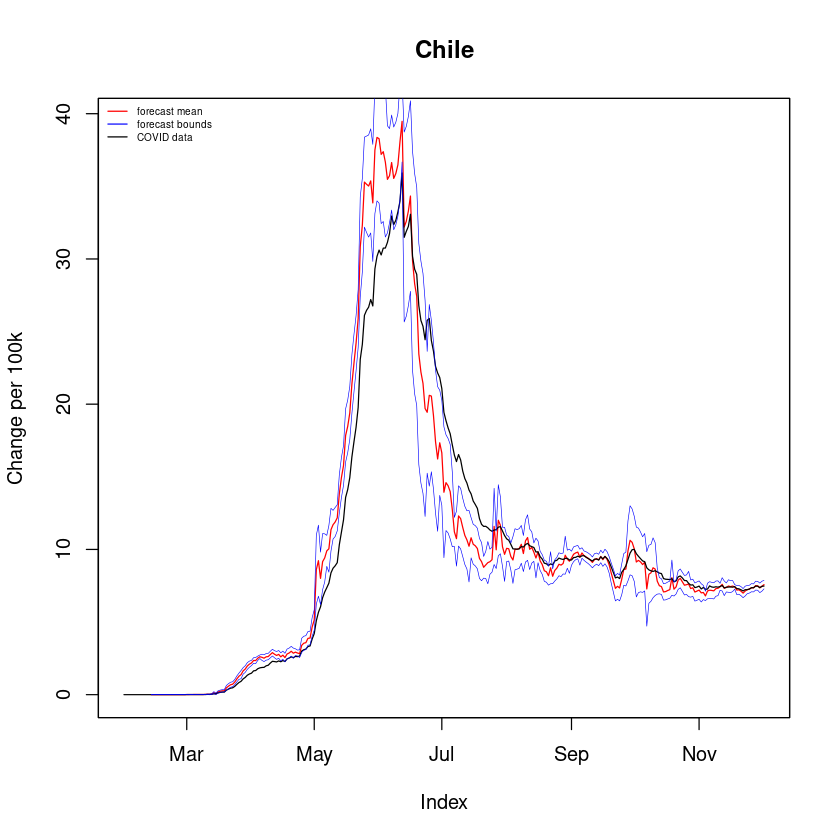

                  ME       RMSE         MAE      MPE     MAPE
Test set 0.004262094 0.03073699 0.009157414 55.35516 78.85524


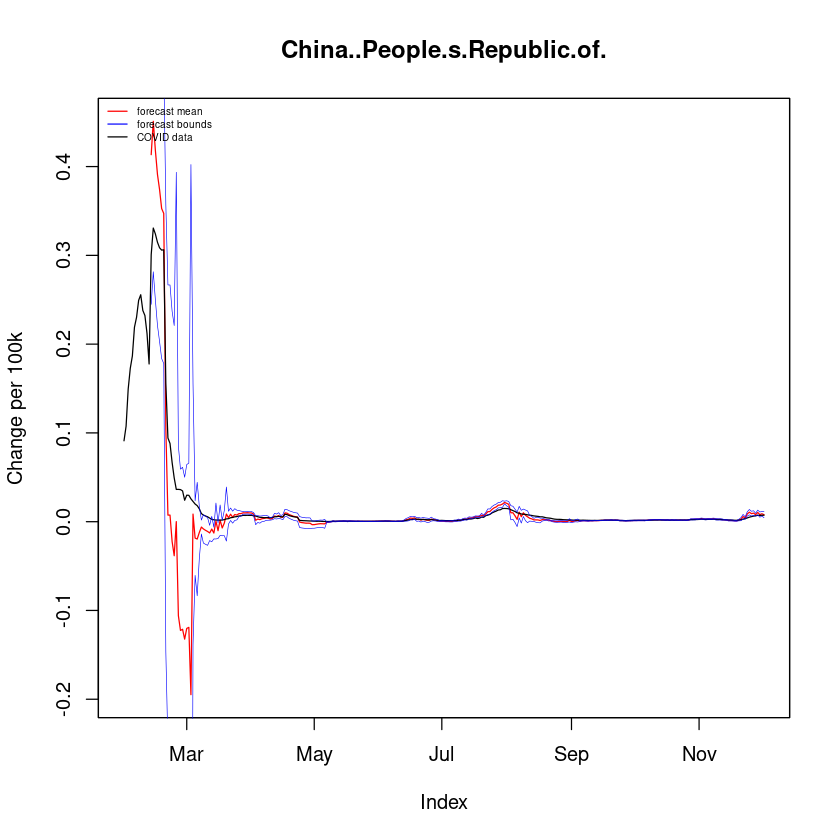

                 ME     RMSE      MAE      MPE     MAPE
Test set -0.2728177 1.411613 1.002215 -15.3431 20.84398


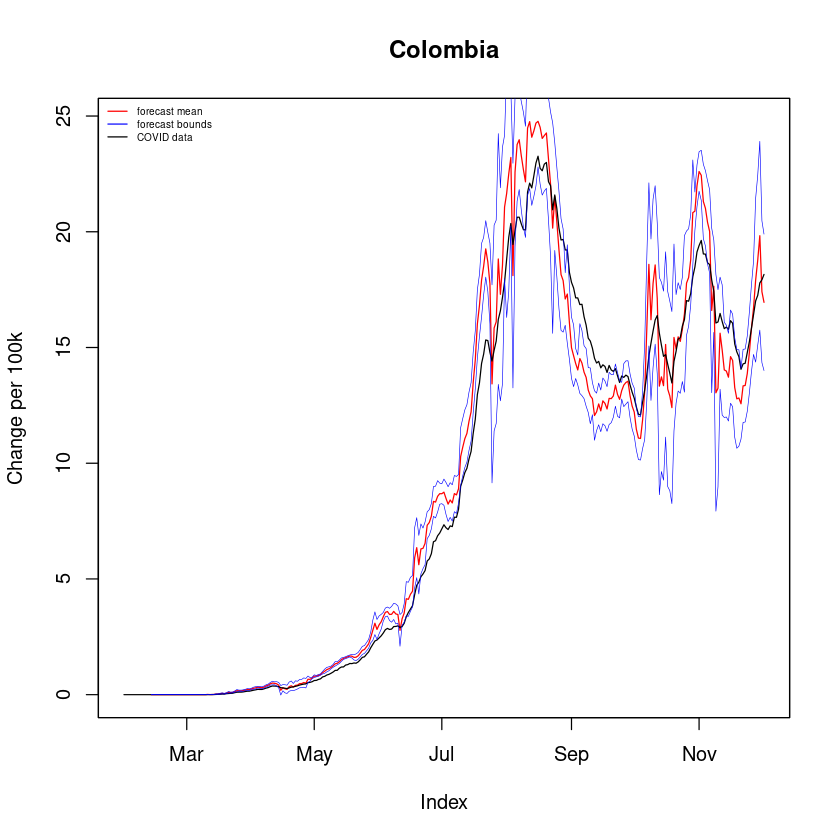

                  ME      RMSE       MAE          MPE         MAPE
Test set -0.07984329 0.3576182 0.2526248 1.526081e+16 1.526081e+16


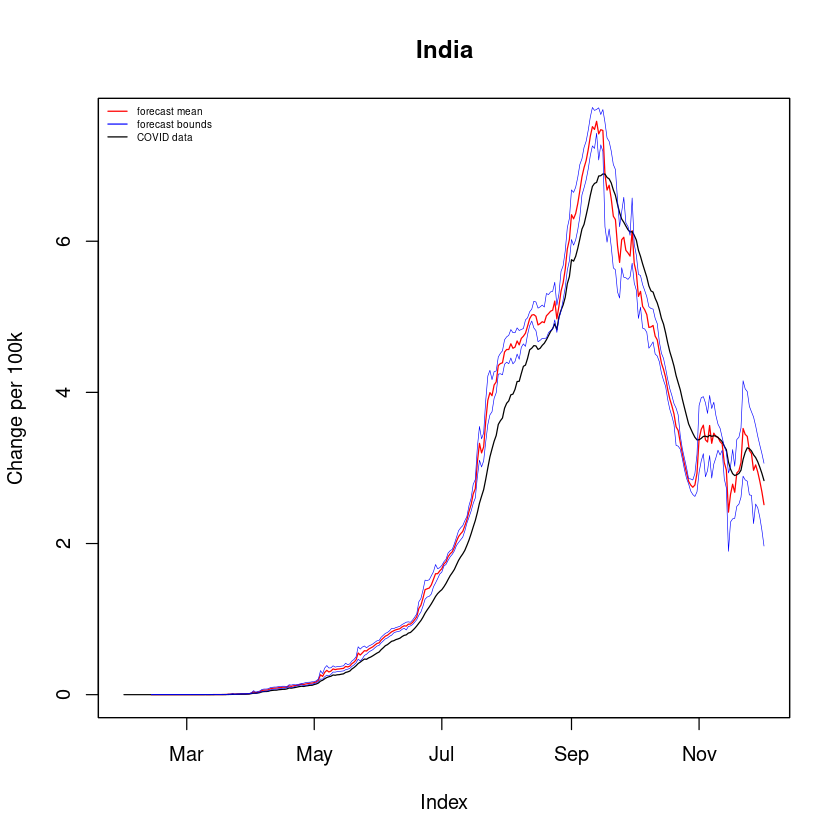

                 ME     RMSE      MAE       MPE     MAPE
Test set -0.5688351 5.703092 3.139973 0.1478058 44.15398


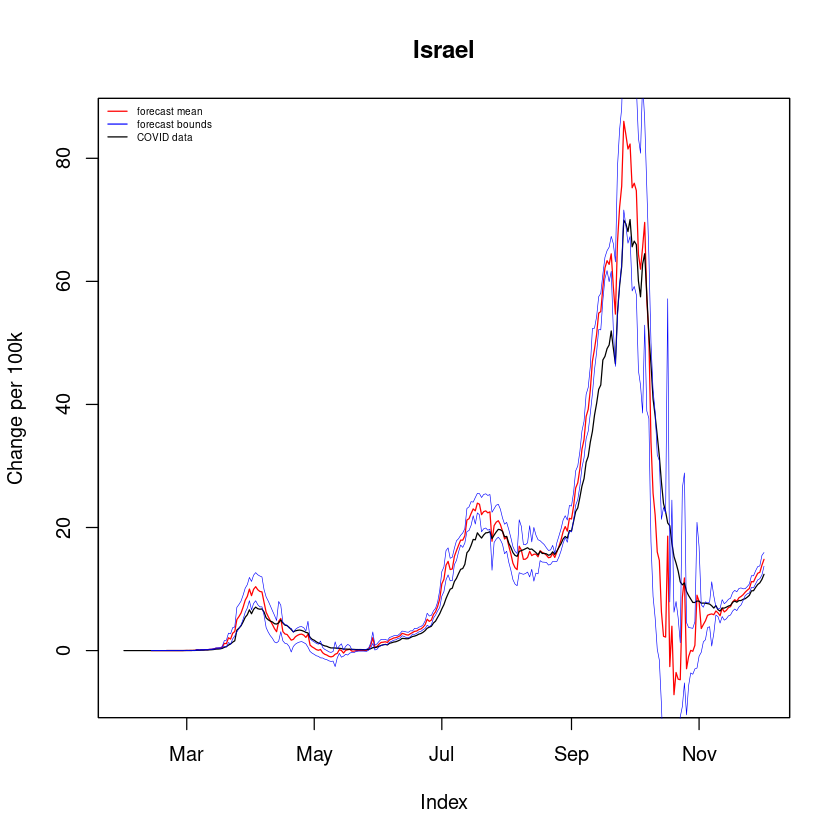

                  ME      RMSE        MAE       MPE     MAPE
Test set -0.03636875 0.1283168 0.08199663 -5.129811 29.31476


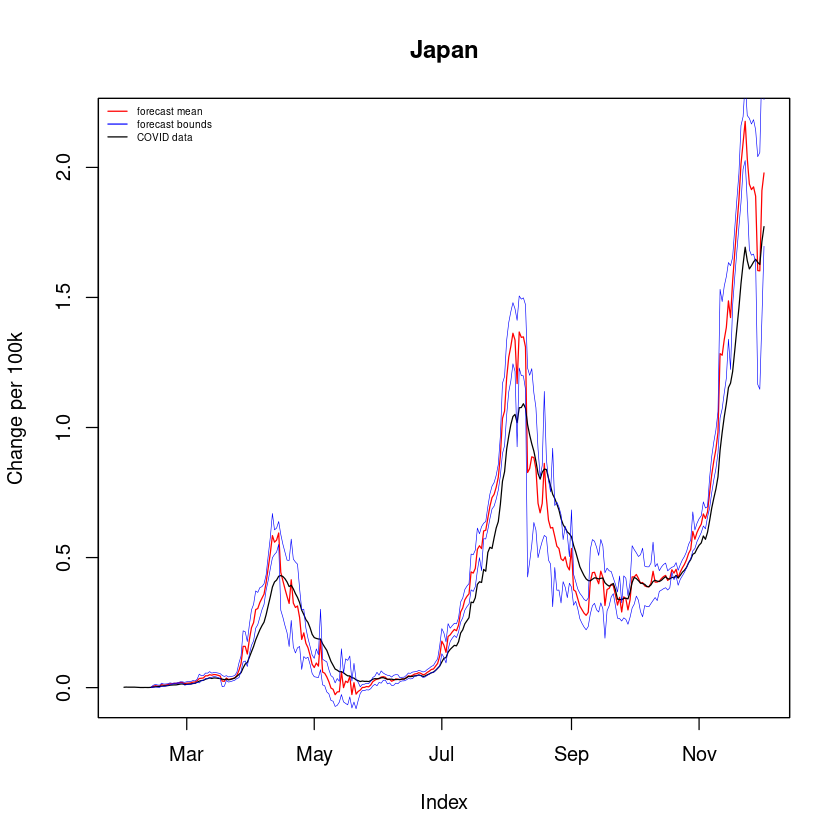

                  ME      RMSE        MAE      MPE     MAPE
Test set -0.02129757 0.1879516 0.09098887 6.582984 37.11308


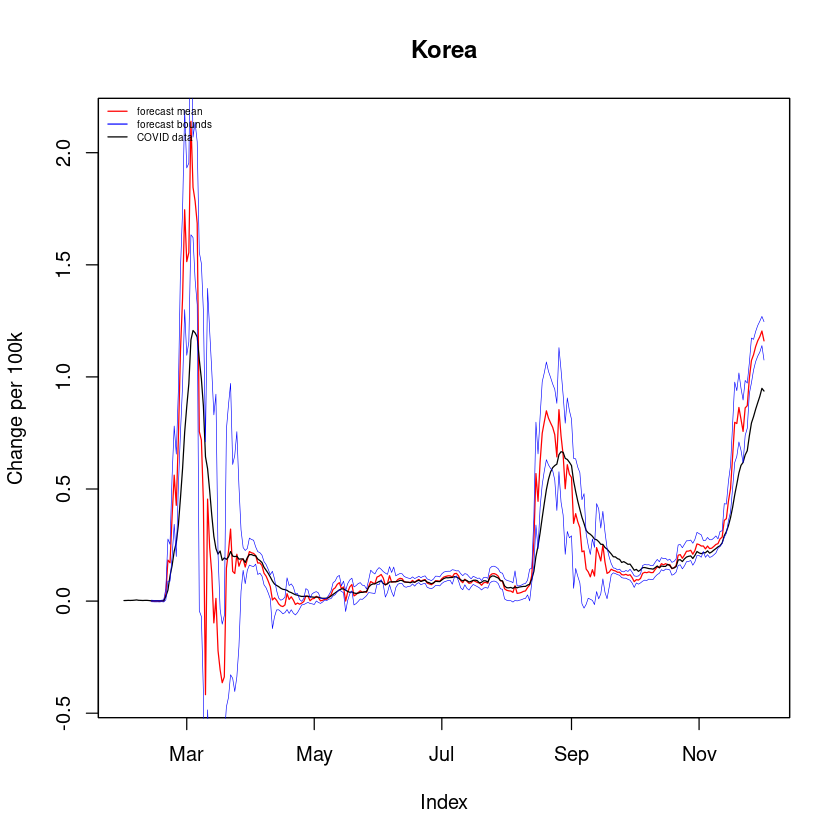

               ME     RMSE      MAE       MPE     MAPE
Test set -1.88783 9.603208 5.262353 -7.951867 46.95081


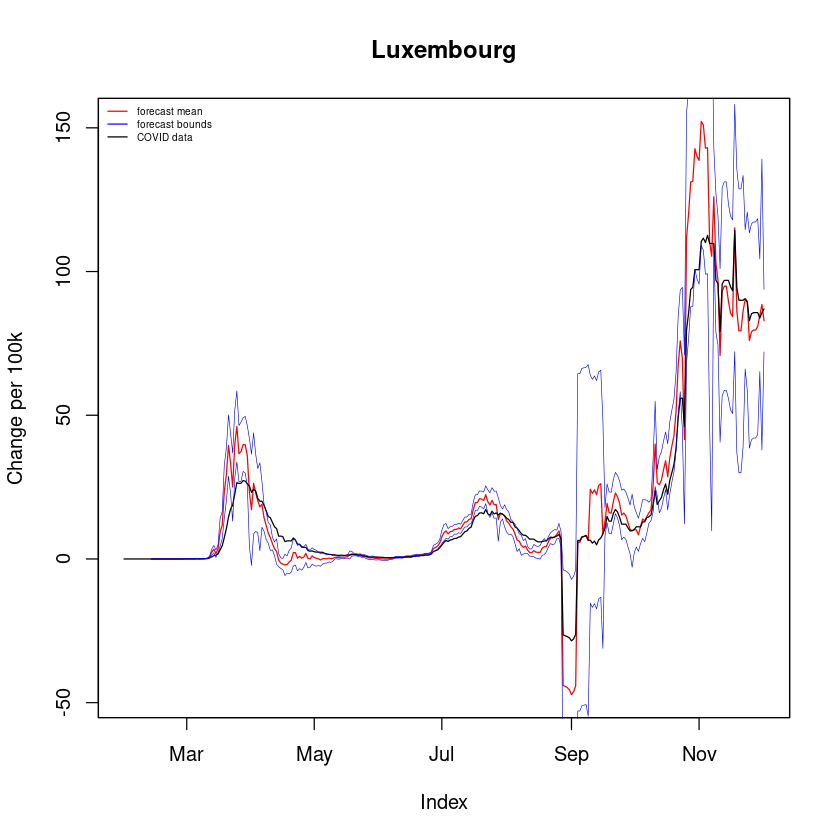

                 ME     RMSE      MAE MPE MAPE
Test set -0.4446824 3.345697 2.185992 Inf  Inf


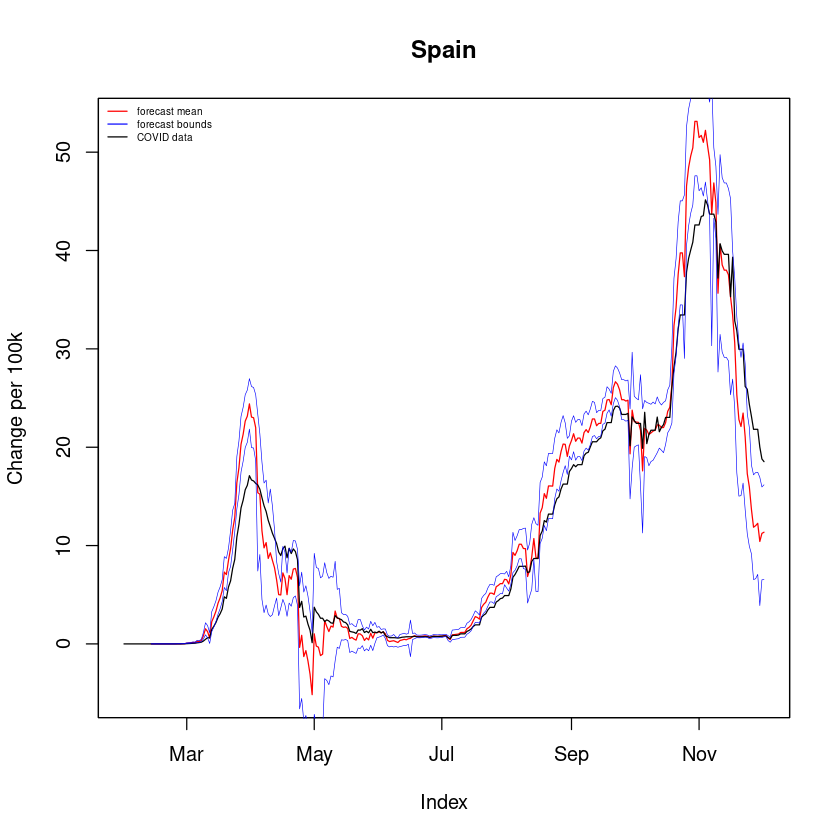

                 ME    RMSE      MAE       MPE     MAPE
Test set -0.5049221 2.34733 1.334058 -10.18595 28.02876


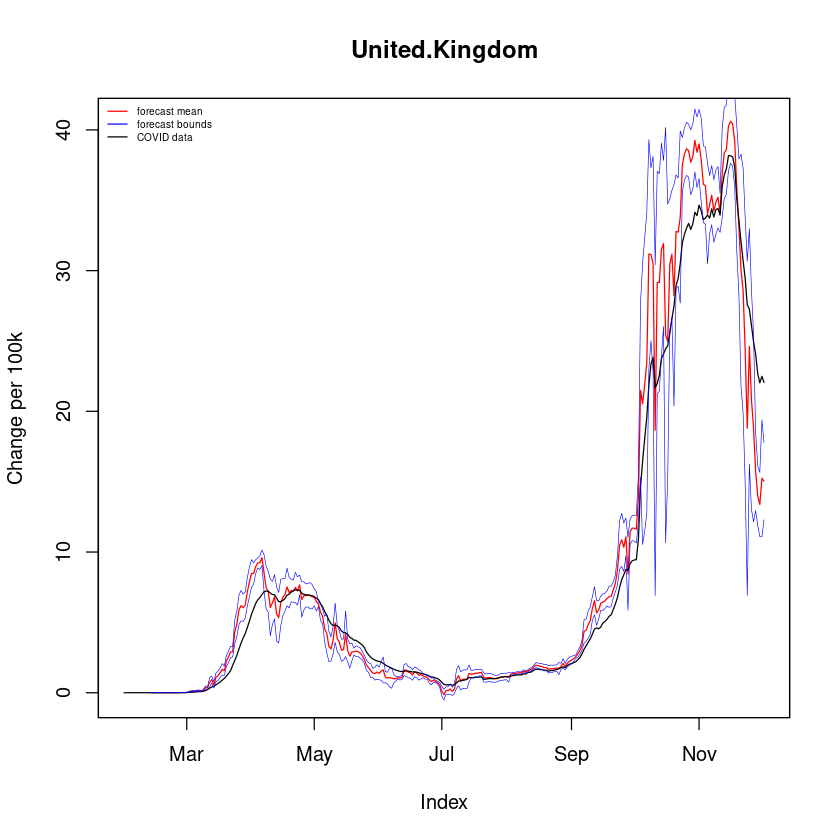

                ME     RMSE      MAE MPE MAPE
Test set -1.162338 2.816772 1.741411 Inf  Inf


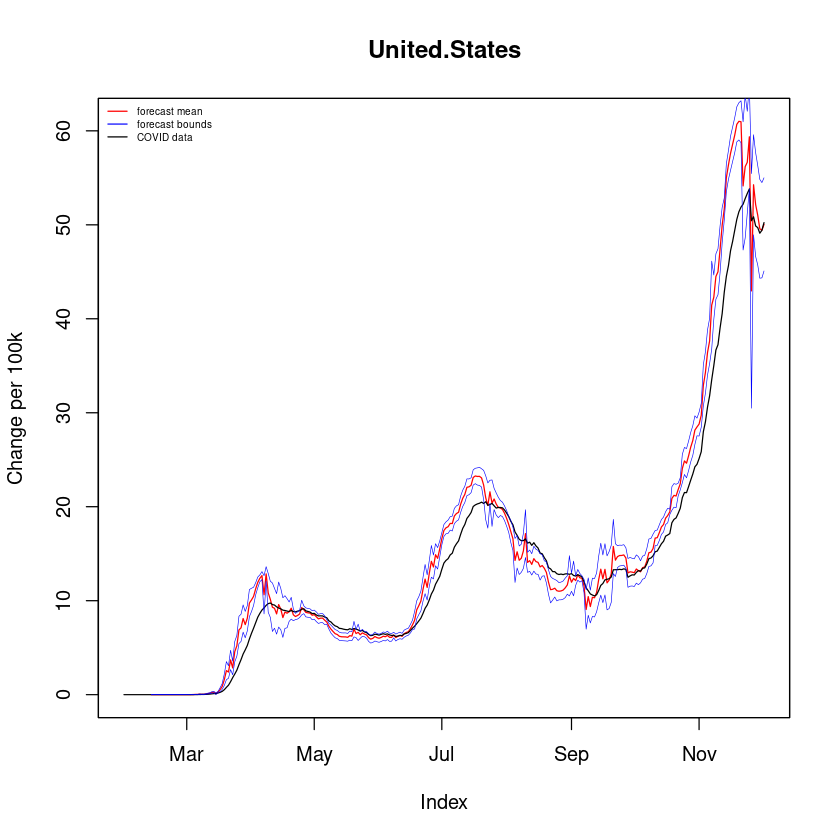

In [186]:
a.ari.fun <- function(x) {
    #n <- paste0(names(x))
    d <- as.character(index(tail(x,1)))
    a.ari <- auto.arima(x = x, d = 1, max.p = 50, max.q = 50, max.P = 50,
                      max.Q = 50, ic = 'aic', approximation = TRUE)
    fore <- forecast.Arima(object = a.ari, h = 7, level = c(.9))
    model <- as.character(fore$model)
    modeli <<- c(modeli,c(d,model))
    mean <- tail(fore$mean, 1)
    low <- tail(fore$lower, 1)
    high <- tail(fore$upper, 1)
    result <- c(low, high, mean)
    names(result) <- c("low", "high", "mean")
    return(result)
}
modlist <- list()
for (i in names(casediff)) {
    ts1 <- casediff[,i]
    #name <- paste0("tsarima.",i)
    modeli <- c()
    tsarima <- rollapply(ts1, 14, a.ari.fun, by.column=FALSE)
    moddf <- data.frame(t(matrix(modeli,2)))
    names(moddf) <- c("Date","model")
    rownames(moddf) <- as.Date(moddf$Date, format = "%Y-%m-%d")
    moddf <- subset(moddf, select = c("model"))
    tsdata <- data.frame(merge(ts1,tsarima))
    names(tsdata) <- c("rate","low", "high", "mean")
    sumfinal <- merge(tsdata,moddf,by=0)
    plot.zoo(tsarima[,"mean"],col="red",plot.type="single",main = i,ylab = "Change per 100k")
    lines(ts1,col="black")
    lines(tsarima[,"high"],col="blue", lwd = .5)
    lines(tsarima[,"low"],col="blue", lwd = .5)
    legend("topleft", inset=c(0,0), y.intersp = 1,
           legend = c("forecast mean", "forecast bounds", "COVID data"),
           lty = 1, bty = "n", col = c("red","blue","black"), cex = .5)
    print(accuracy(ts(tsarima$mean),ts1))
    modlist[[i]] <- sumfinal
}

In [188]:
c <- list()
for (n in b) {
    for (i in rownames(n)) {
        c[[i]] <- sum(as.vector(n[i,]),c[[i]])
    }
}

In [189]:
modelsumdf <- as.matrix(unlist(c))
data.frame(modelsumdf[order(-modelsumdf[,1]),])

,modelsumdf.order..modelsumdf...1.....
"ARIMA(0,1,0) with drift",1971
"ARIMA(1,1,0) with drift",567
"ARIMA(1,1,0)",377
"ARIMA(2,1,0) with drift",233
"ARIMA(0,1,1) with drift",173
"ARIMA(2,1,0)",100
"ARIMA(0,0,0) with non-zero mean",89
"ARIMA(3,1,0) with drift",76
"ARIMA(4,1,0) with drift",52
"ARIMA(0,1,1)",39


In [187]:
df <- data.frame(matrix(ncol = 1, nrow = 0))
x <- c("summary.modlist..i...model.")
colnames(df) <- x
b <- list()
for (i in names(modlist)) {
    print(i)
    df2 <- as.matrix(summary(modlist[[i]]$model))
    b[[i]] <- df2
    }
b

[1] "Argentina"
[1] "Belgium"
[1] "Chile"
[1] "China..People.s.Republic.of."
[1] "Colombia"
[1] "India"
[1] "Israel"
[1] "Japan"
[1] "Korea"
[1] "Luxembourg"
[1] "Spain"
[1] "United.Kingdom"
[1] "United.States"


"ARIMA(0,0,0) with non-zero mean",19
"ARIMA(0,1,0) with drift",138
"ARIMA(0,1,1)",4
"ARIMA(0,1,1) with drift",12
"ARIMA(1,1,0)",34
"ARIMA(1,1,0) with drift",40
"ARIMA(1,1,1)",3
"ARIMA(2,1,0)",6
"ARIMA(2,1,0) with drift",23
"ARIMA(2,1,2) with drift",1
"ARIMA(3,1,0)",2


In [190]:
library(ggplot2)

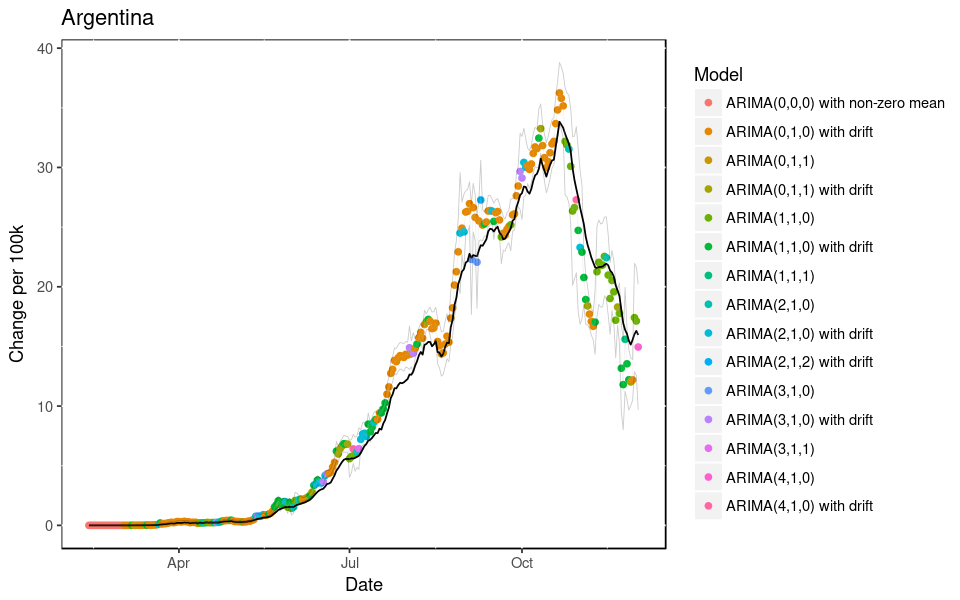

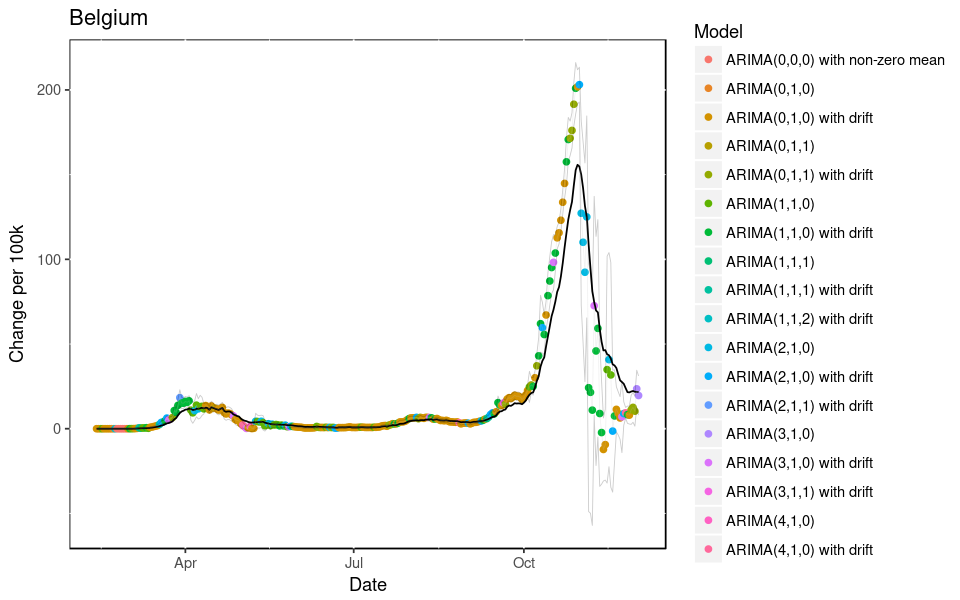

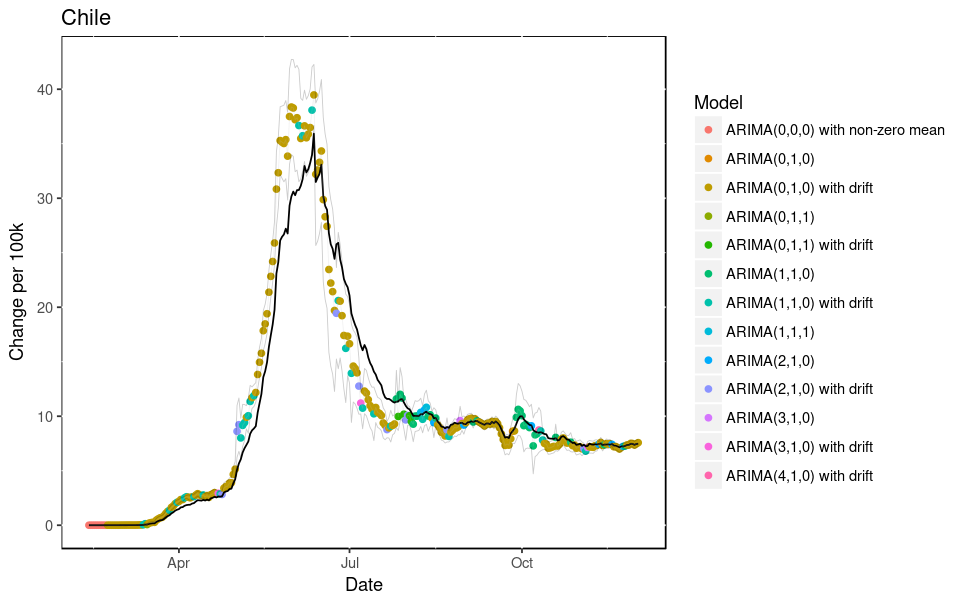

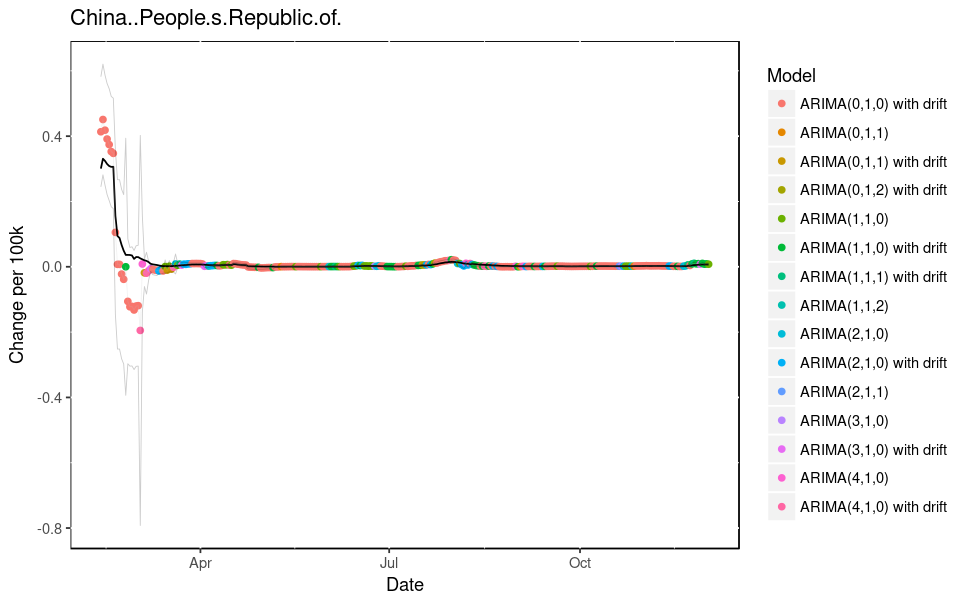

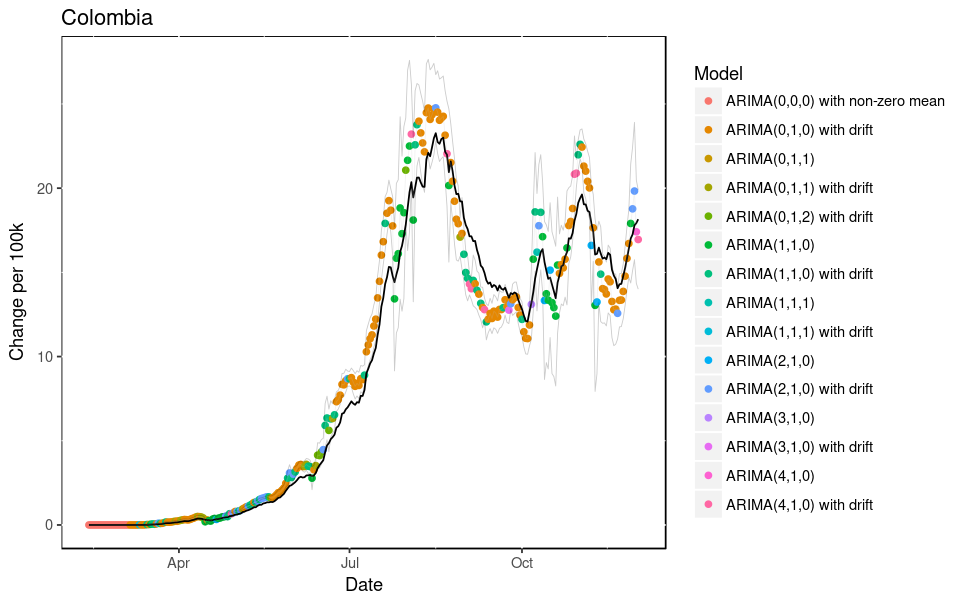

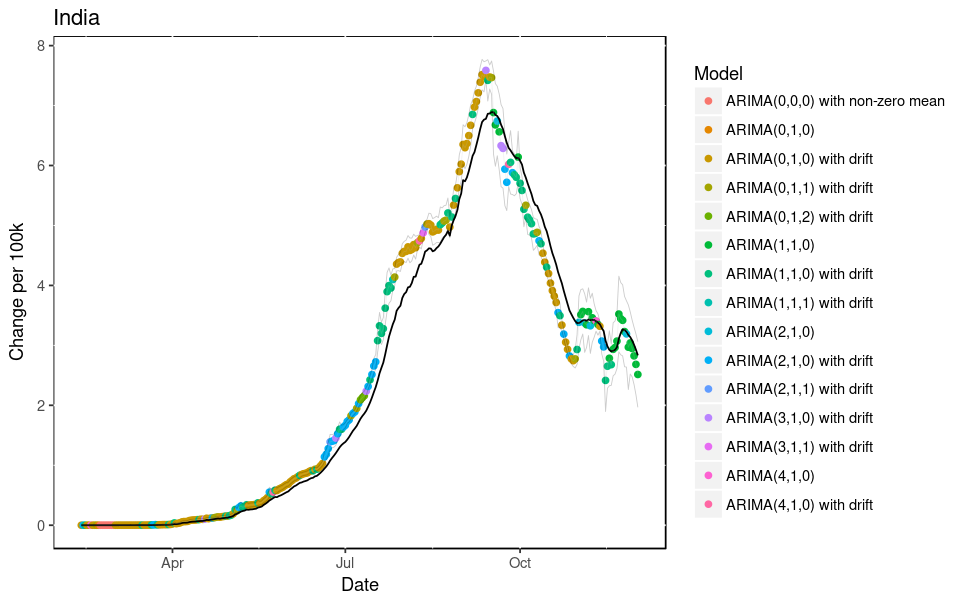

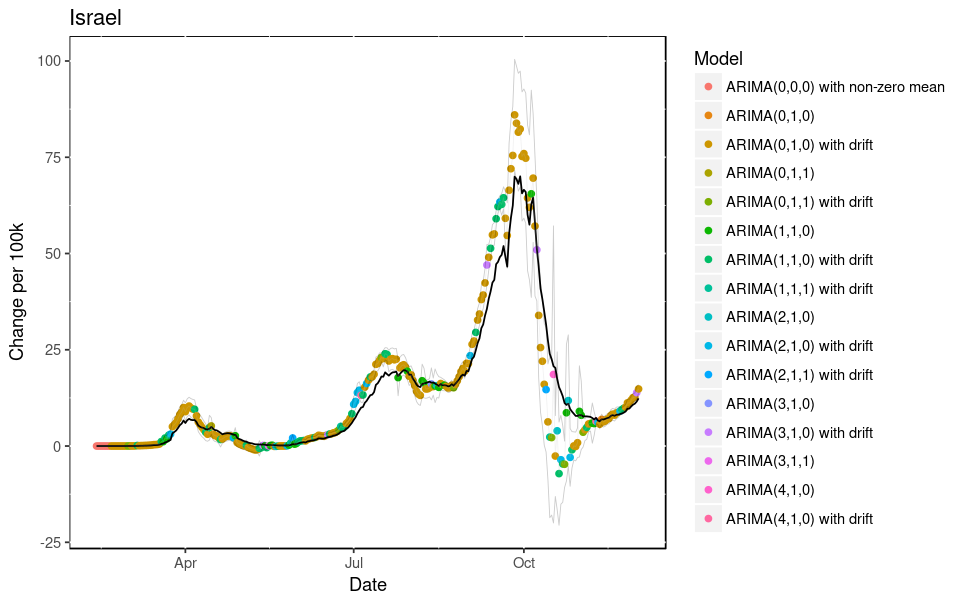

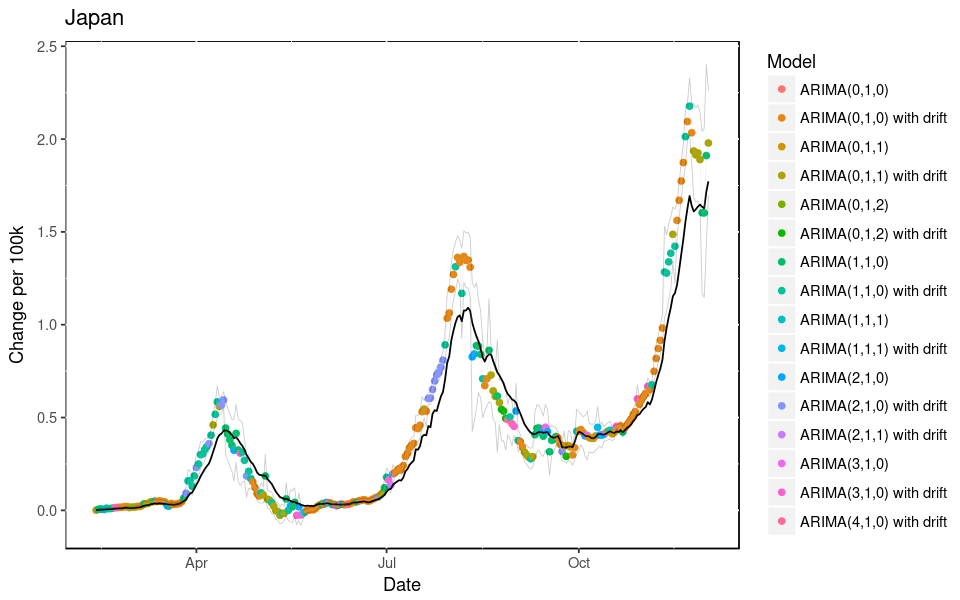

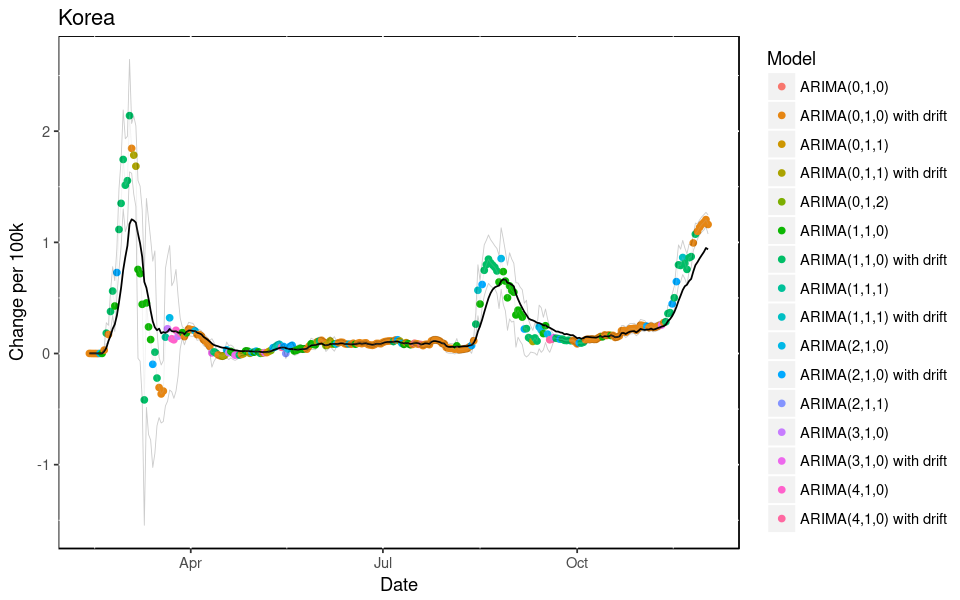

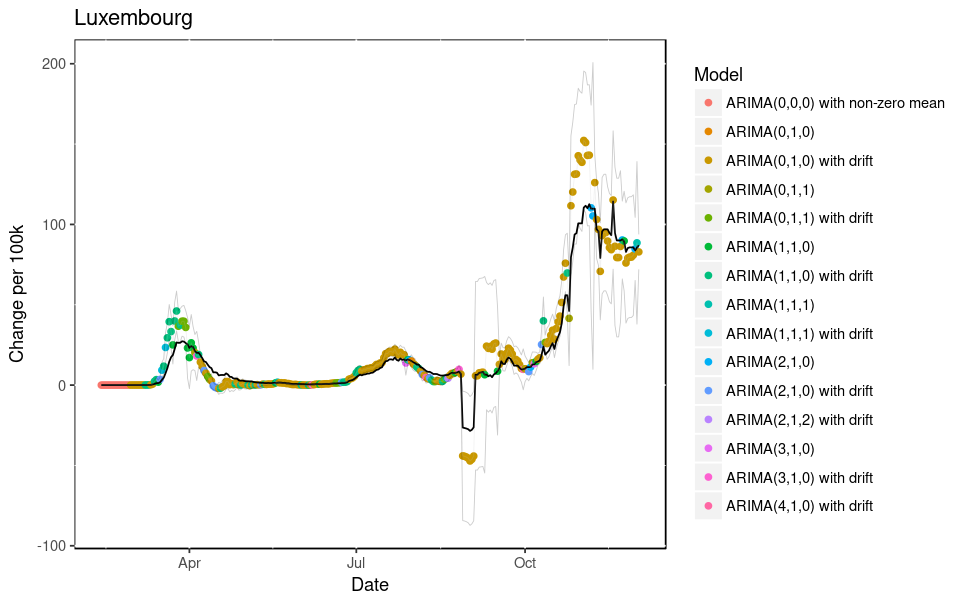

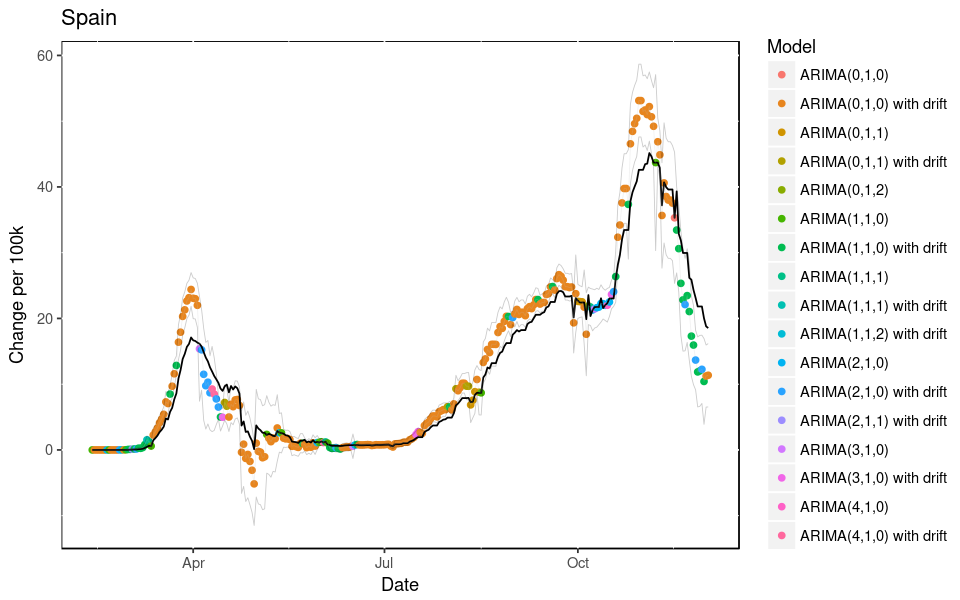

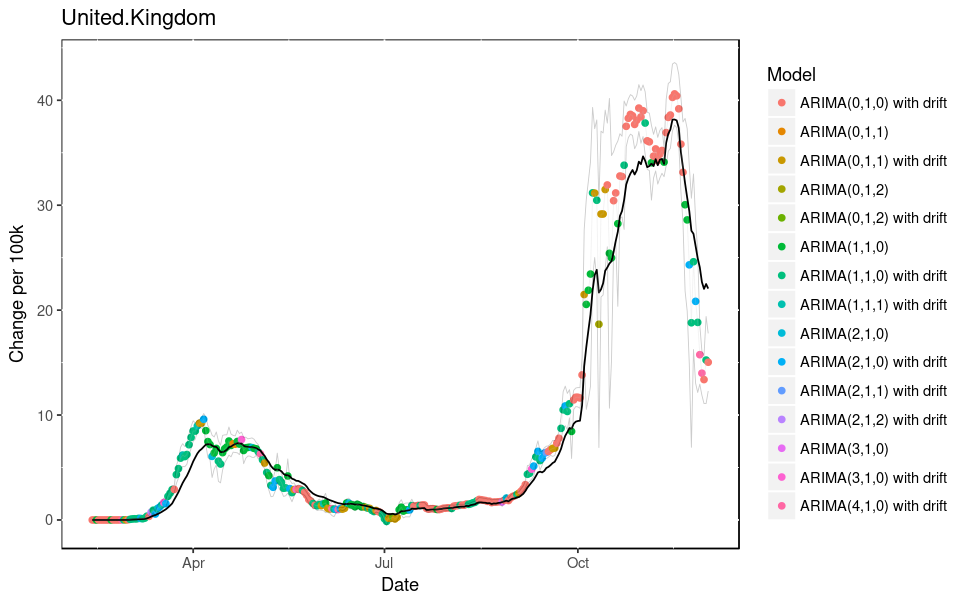

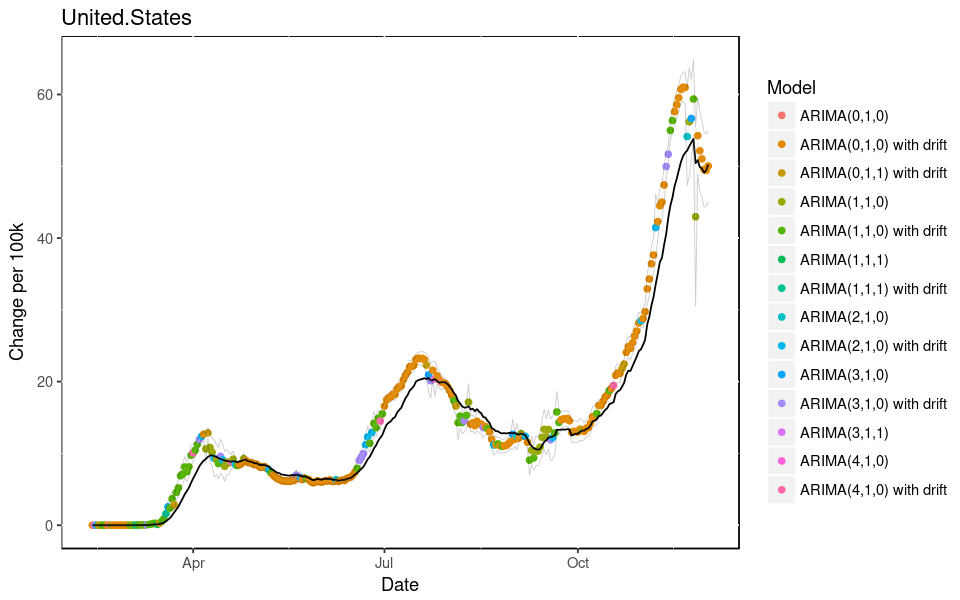

In [203]:
for (n in names(modlist)) {
    main = as.character(n)
    options(repr.plot.width = 8, repr.plot.height = 5)
    print(ggplot(modlist[[n]], aes(as.Date(as.character(Row.names), format = "%Y-%m-%d"), mean)) + ggtitle(main) +
          geom_point(aes(colour = factor(model))) + 
          geom_line(aes(y=rate)) +
          geom_line(aes(y=high),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=low),lwd=.25,alpha = 0.2) +
          geom_line(aes(y=mean),col="gray",lwd=.25,alpha = 0.2) +
          xlab("Date") + ylab("Change per 100k") + 
          theme(panel.background = element_rect(fill = 'white', colour = 'black')) +
          scale_color_discrete(name="Model")
          )
}


Row.names,rate,low,high,mean,model
2020-02-13,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-14,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-15,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-16,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-17,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-18,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-19,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-20,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-21,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"
2020-02-22,0.0000000000,0.0000000000,0.0000000000,0.0000000000,"ARIMA(0,0,0) with non-zero mean"


In [208]:
UScase = casediff[,'United.States']

In [214]:
accuracy(forecast(Arima(UScase, order = c(0,1,0), include.drift = TRUE),7))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-5.338596e-07,0.4887743,0.3233544,-Inf,Inf,0.02420579,0.6042687


In [265]:
totarim <- list()
for (i in 1:ncol(casediff)) {
    ts11 = casediff[,i]
    na = names(ts11)
    model = auto.arima(ts11)
    fore = forecast.Arima(Arima(ts11, model = model),14)
    print(fore)
}

        Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
1105201       15.97565 15.647138 16.30416 15.473235 16.47806
1108801       16.04595 15.432693 16.65920 15.108057 16.98383
1112401       16.11385 15.175734 17.05196 14.679127 17.54857
1116001       15.92603 14.631864 17.22020 13.946774 17.90529
1119601       15.78588 14.039109 17.53266 13.114424 18.45734
1123201       15.67544 13.423772 17.92711 12.231810 19.11907
1126801       15.72489 12.921499 18.52829 11.437472 20.01232
1130401       15.68183 12.320357 19.04331 10.540900 20.82277
1134001       15.62178 11.666234 19.57733  9.572293 21.67127
1137601       15.47205 10.891542 20.05256  8.466766 22.47734
1141201       15.42010 10.166248 20.67396  7.385024 23.45518
1144801       15.36237  9.412176 21.31256  6.262336 24.46240
1148401       15.35218  8.677295 22.02707  5.143822 25.56055
1152001       15.25876  7.842147 22.67537  3.916030 26.60149
        Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
1105201       21.51642

ERROR: Error in Ops.POSIXt(driftmod$coeff[2], time(x)): '*' not defined for "POSIXt" objects
